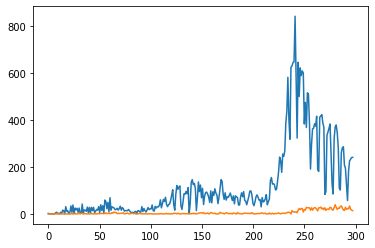

0.6445883427961401   2.8622283342194676e-36


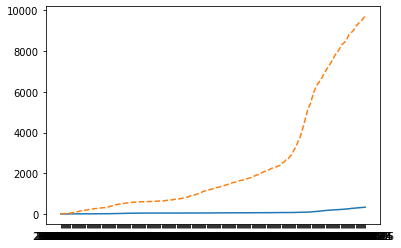

      0              1              2     3     4    5
0     2     Banja Luka      Бања Лука  9714  4438  330
1     5      Bijeljina       Бијељина  3917  1877  112
2   119        Zvornik        Зворник  1832  1099   62
3   107       Trebinje        Требиње  1532   630   45
4     8       Gradiška       Градишка  1315   690   74
..  ...            ...            ...   ...   ...  ...
57   12         Drinić         Дринић    20     2    1
58   72    Donji Žabar     Доњи Жабар    18     2    4
59   34     Pelagićevo     Пелагићево     8     1    0
60  105  Istočni Drvar  Источни Дрвар     3     2    0
61   55  Kupres-Blagaj  Купрес-Благај     2     0    1

[62 rows x 6 columns]
               Mjesto  Novi  Umrli  Oporavljeni  Testirani  Kriticni
0          Banja Luka    60      3            0          0         0
1           Bijeljina    34      1            0          0         0
2            Trebinje    25      1            0          0         0
3               Doboj    21      1       

ValueError: Expected object or value

In [1]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np

from scipy.stats import pearsonr


podaci = pd.read_json("../data-etfbl/podaci-rs.txt" )

pt.plot( np.linspace(0, 297, 297), podaci["novi"] )
pt.plot( np.linspace(0, 297, 297), podaci["umrli"] )

pt.show()
podaci

koef, pval = pearsonr(podaci["novi"], podaci["umrli"])
print(koef, " ", pval) # koef = 0.645

# po gradu (Banja Luka):
#podaci_po_gradovima = pd.read_json("../data-etfbl/podaci_po_gradovima.txt" )
#podaci_po_gradovima

#gradovi:
gradovi = pd.read_json("../data-etfbl/mjesta.txt" )
gradovi

# kumulativno (gradovi) ===> ovdje samo za Banja Luka
kumulativno_po_gradovima = pd.read_json("../data-etfbl/kumulativno-gradovi-2.txt" )
kumulativno_po_gradovima.columns = ["datum", "zarazenih", "umrlih", "aktivnih",  "k1", "k2"]
kumulativno_po_gradovima = kumulativno_po_gradovima.sort_values(by=["datum"])

pt.plot(kumulativno_po_gradovima["datum"], kumulativno_po_gradovima["umrlih"] )
pt.plot(kumulativno_po_gradovima["datum"], kumulativno_po_gradovima["zarazenih"], "--" )
pt.show()

#dnevni-podaca-gradovi.txt
dnevni_podaci_gradovi = pd.read_json("../data-etfbl/dnevni-podaca-gradovi.txt" )
print(dnevni_podaci_gradovi)

# citanje po podacima: 26.12.2020. (konkretno)
podaci_2020_12_26 = pd.read_json("../data-etfbl/2020-12-26.txt")
print(podaci_2020_12_26)
# 25.12.2020.
podaci_2020_12_25 = pd.read_json("../data-etfbl/2020-12-25.txt")
print(podaci_2020_12_25)


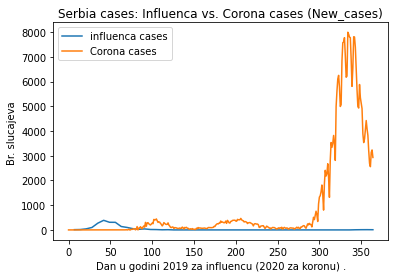

koef corel:  -0.47048013457030263    pval:  0.00043212014032562875


Ttest_indResult(statistic=8.0664568127343, pvalue=1.5080769602159808e-05)

In [19]:
# COVID cases vs. INFLUENCA cases (Serbia for now considered)

import pandas as pd
import matplotlib.pyplot as pt
import numpy as np

flu_serbia = pd.read_csv("../data/flu_serbia.csv")
flu_serbia_y2020 = flu_serbia[flu_serbia["Year"] == 2019] 
flu_serbia_y2020_w10 = flu_serbia_y2020[ (flu_serbia_y2020["Week"] >= 0)] # & (flu_serbia_y2020["Year"] >= 0) ] | za or

# columns to use

column_flu_compare = "ALL_INF" # "INF_A"
column = "New_cases" #or "New_cases"
shift = 0

pt.plot(flu_serbia_y2020_w10["Week"] * 7, flu_serbia_y2020_w10[ column_flu_compare ], label="influenca cases" )
pt.xlabel("Dan u godini 2019 za influencu (2020 za koronu) .")
pt.ylabel("Br. slucajeva ")

# korona podaci i odnos:
# who podaci: WHO-COVID-19-global-data.csv
# start with March (first positive COVID case)

who_dat = pd.read_csv("../data/WHO-COVID-19-global-data.csv")
who_dat_serbia = who_dat[ who_dat["Country"] == "Serbia"  ]
who_dat_serbia_pos = who_dat_serbia #[who_dat_serbia["New_cases"] > 0   ]
who_dat_serbia_pos = who_dat_serbia_pos[shift: (shift + 365) ]
pt.plot( range(shift, (who_dat_serbia_pos[ column ].shape[ 0 ] + shift), 1), who_dat_serbia_pos[ column ].values, label="Corona cases" )
pt.legend()
pt.title("Serbia cases: Influenca vs. Corona cases " + "(" + column + ")" )
pt.show()

# corelation between corona cases in (2020) and influenca cases in 2019: all for Serbia 

from scipy.stats import spearmanr  
#print(who_dat_serbia_pos)

# cumul. per week function:

def cumul_by_week(dat):
    cumul_by_week_serbia = []
    for i in range(len(dat) // 7 ):
        cumul_by_week_serbia.append(dat[ column ][ i*7 :  (i+1) * 7 ].mean())
    
    return cumul_by_week_serbia

cumul_by_week_serbia = cumul_by_week(who_dat_serbia_pos)
    
value, pval = spearmanr(flu_serbia_y2020_w10[ column_flu_compare ].values, cumul_by_week_serbia  )
print("koef corel: ", value, " ", " pval: ", pval)

# signiffincant difference: january == march (death cases Corona 2021 vs. Flu 2019), first 70 days of the respective years

who_dat_serbia_year2021 = who_dat_serbia[who_dat_serbia["Date_reported"] >= "2021-01-01"][0:70]
flu_serbia_y2019_w10  = flu_serbia_y2020_w10[flu_serbia_y2020_w10["Week"] <= 10 ]
cumul_by_week_serbia_y2021 = cumul_by_week(who_dat_serbia_year2021)

from scipy import stats
#This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.
# H_0: mi_1 = mi_2 (same mean values) H_1: mi_1 < mi_2
stats.ttest_ind(cumul_by_week_serbia_y2021, flu_serbia_y2019_w10[ column_flu_compare ].values, equal_var = False)

# Pitanje: da li ovo znaci da nema bitnije razlike izmedju ocekivanog broja umrlih od korone u 2021 i broja od influence u 2019 (januar-mart)? 



In [16]:
import pandas as pd 
from scipy.stats import pearsonr, spearmanr

world = pd.read_csv("../data/world-covid-data.csv")
world_todate = world[world["date"] == "2/14/2021"] # newest date in the data ==> read data at this point
# world_todate = world_todate.dropna()
# aggregate:
ww_restr = world_todate[["iso_code", "total_deaths_per_million", "hospital_beds_per_thousand", "cardiovasc_death_rate", "diabetes_prevalence"] ]
ww_restr_group = ww_restr.groupby(["iso_code"]).agg({"total_deaths_per_million": "max", "hospital_beds_per_thousand" : "max", "cardiovasc_death_rate" : "max", "diabetes_prevalence": "max"})
ww_restr_group = ww_restr_group.reset_index()
ww_restr_group
# correlation  between some attrbutes ==> all countries considered
coef, pval = spearmanr(ww_restr_group.dropna()["total_deaths_per_million"], ww_restr_group.dropna()["hospital_beds_per_thousand"])
print(coef, " ", pval)

coef, pval = spearmanr(ww_restr_group.dropna()["total_deaths_per_million"], ww_restr_group.dropna()["cardiovasc_death_rate"])
print(coef, " ", pval)
coef, pval = spearmanr(ww_restr_group.dropna()["total_deaths_per_million"], ww_restr_group.dropna()["diabetes_prevalence"])
print(coef, " ", pval)


0.4423868132685452   7.376180012166642e-09
-0.2348184792400942   0.003170903031007381
0.05786031945369918   0.473087592430245


In [ ]:
"""
from sklearn import datasets 
import pandas as pd


def model(b_0, c_1, podaci):
    return b_0 + c_1 * podaci


data = datasets.load_boston()
X = data.data # 506 instanci
Y = data.target
# prelazak sa nizova i matrica na dataframe 
X = pd.DataFrame(X,  columns=data.feature_names)
Y = pd.DataFrame(Y, columns=["target"])
#Y
print(X.describe()) # razlicit domen vrijednosti atributa
#X.corr()
# distribucija podataka za kolone 
X.hist(figsize=(15,15) )
# podjela trening ==> test podaci 
from sklearn import model_selection 

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.33, random_state = 7)

# skaliranje podataka ==> na istu skalu ====> standardScaler
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)  #.values.reshape(-1, 1))
X_train = scaler.transform(X_train) #.values).reshape(-1, 1))
X_test = scaler.transform(X_test) #.values).reshape(-1,1))

# modelovanje:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
y_predict = model.predict(X_test)

# metrika (koliko je model dobar:)

from sklearn import metrics 

score = metrics.r2_score(y_predict, Y_test)
print(score)

# cuvanje modela:
import pickle
model_filename = 'boston_houses.model'

with open(model_filename, 'wb') as pickle_file:
    pickle.dump(model, pickle_file)
# CUVANJE SKALERA:
scaler_filename = 'models/boston_houses.scaler'
with open(scaler_filename, 'wb') as pickle_file:
    pickle.dump(scaler, pickle_file)
"""